Project Title: Credit Risk Assessment for Loan Approval


In [2]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
     -------------------------- ----------- 194.6/282.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.express as ex
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv("G:\credit_risk.csv")
df.head().T

,0,1,2,3,4
Id,0,1,2,3,4
Age,22,21,25,23,24
Income,59000,9600,9600,65500,54400
Home,RENT,OWN,MORTGAGE,RENT,RENT
Emp_length,123.0,5.0,1.0,4.0,8.0
Intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
Amount,35000,1000,5500,35000,35000
Rate,16.02,11.14,12.87,15.23,14.27
Status,1,0,1,1,1
Percent_income,0.59,0.1,0.57,0.53,0.55


In [5]:
#INSPECTING DATAFRAME STRUCTURE

# Check first 5 lines
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [6]:
# Check last 5 lines
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [7]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [8]:
#check missing values
df.isna().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [9]:
#replace the null numbers with mean
# Downloading library to change null data in 'mean'.

from sklearn.impute import SimpleImputer
most_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [10]:
# Changing NaN data to "more frequent" in 'object' columns

df['Emp_length'] = most_imputer.fit_transform(df[["Emp_length"]])
df['Rate'] = most_imputer.fit_transform(df[["Rate"]])

In [11]:
# Null Data
df.isna().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [12]:
# Drop 'Id' column

df.drop(["Id"], axis=1, inplace=True)

In [13]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 165


In [14]:
#there are 165 duplicates data in dataset, let's delete them
# Dropping ALL duplicate values

df.drop_duplicates(keep=False,inplace=True)

In [15]:
# Check row and column numbers

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 32251
Columns: 11


In [16]:
# Number of unique values per column.

df.nunique()

Age                 58
Income            4279
Home                 4
Emp_length          37
Intent               6
Amount             753
Rate               349
Status               2
Percent_income      76
Default              2
Cred_length         29
dtype: int64

In [17]:
# Check the unique values and frequency for 'Status'

df['Status'].value_counts()

Status
0    25181
1     7070
Name: count, dtype: int64

#Performing EDA

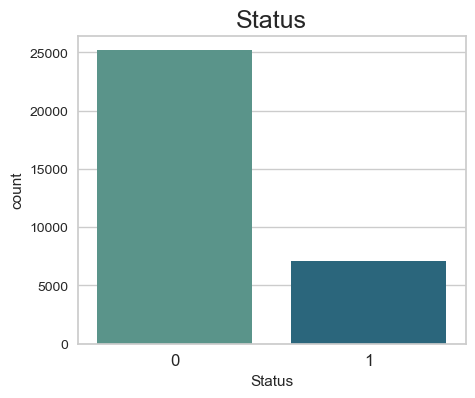

In [18]:
# Status - Target Feature

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x=df["Status"], palette="crest")
plt.title('Status', fontsize = 18)
plt.xticks(fontsize = 12)
plt.show()

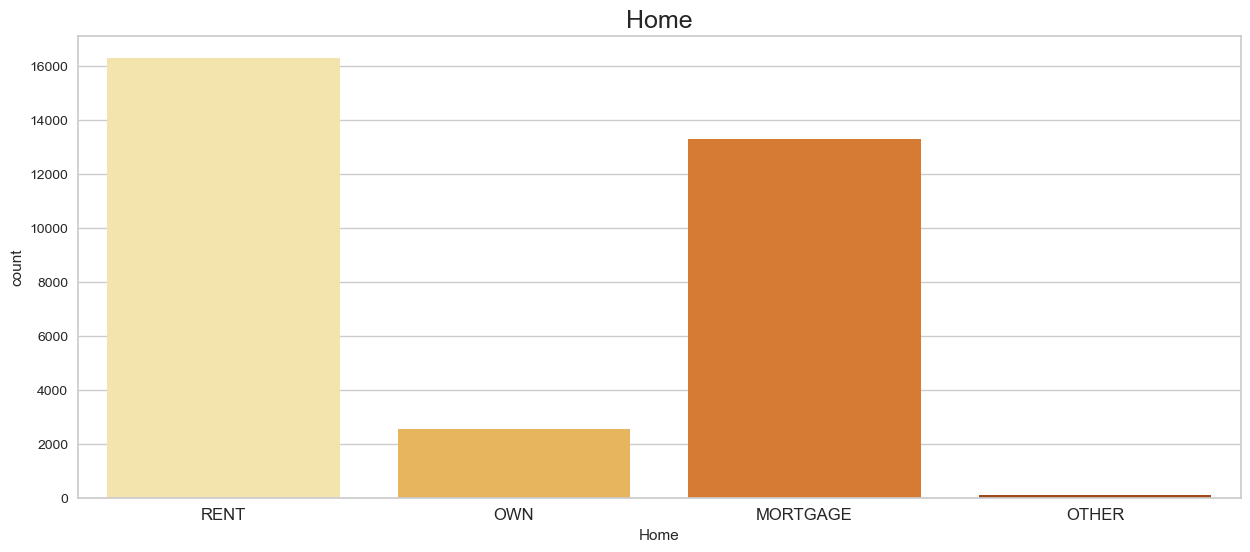

In [19]:
# Home

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df["Home"], palette="YlOrBr")
plt.title('Home', fontsize = 18)
plt.xticks(fontsize = 12) 
plt.show()

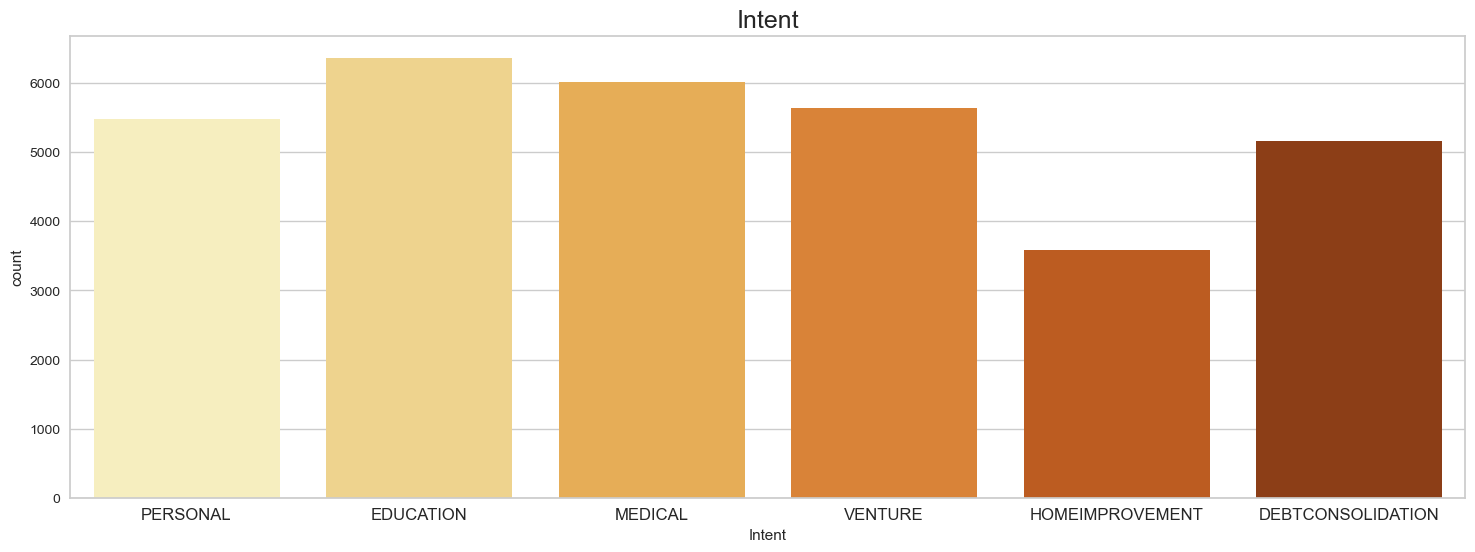

In [20]:
# Intent

fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Intent"], palette="YlOrBr")
plt.title('Intent', fontsize = 18)
plt.xticks(fontsize = 12) 
plt.show()

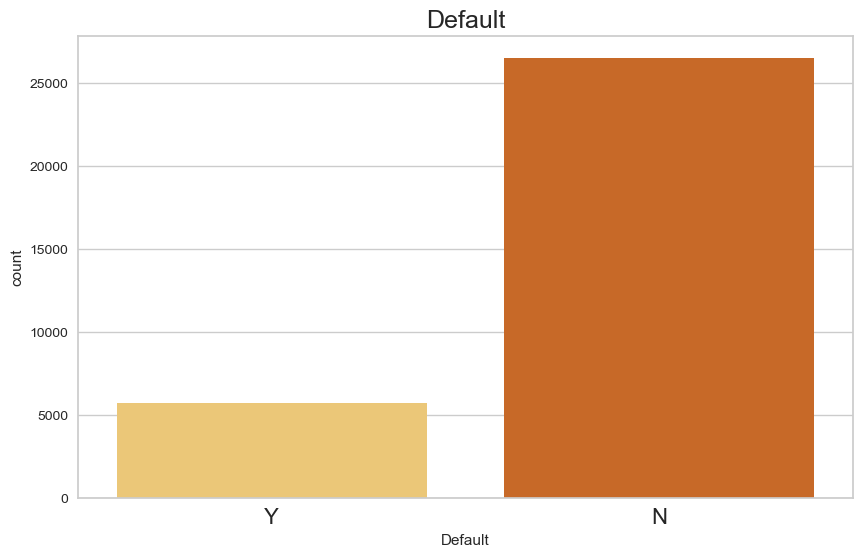

In [21]:
# Default

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df["Default"], palette="YlOrBr")
plt.title('Default', fontsize = 18)
plt.xticks(fontsize = 16) 
plt.show()

Now let's change object columns to numeric using labelencoder. We will do this to prepare the dataframe for applying the algorithms.

In [22]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [23]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


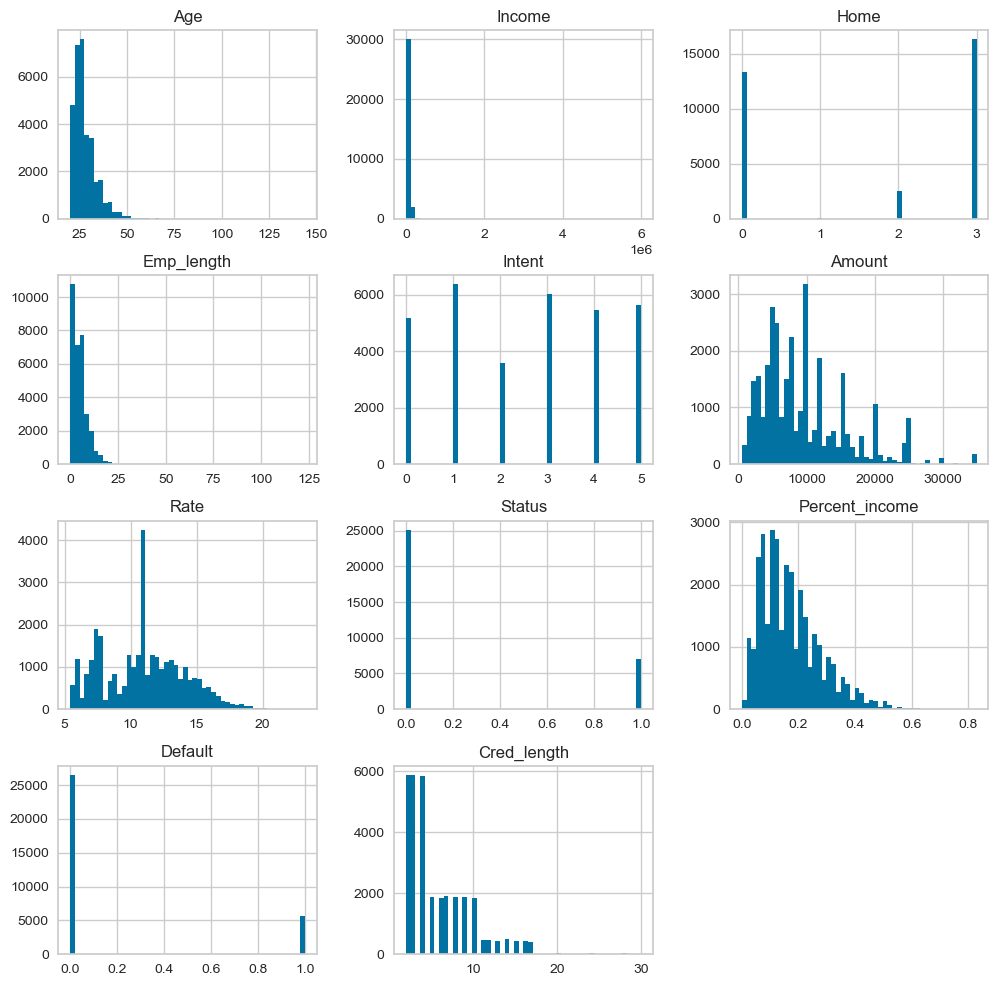

In [24]:
# Histogram Dataset

df.hist(bins=50, figsize=(12,12))
plt.show()

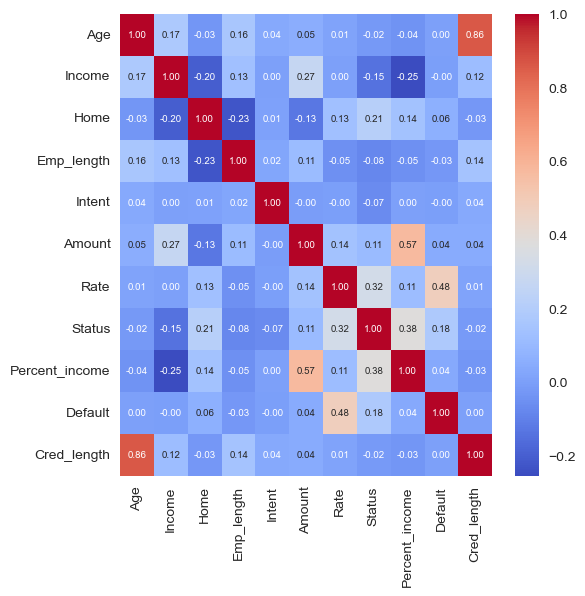

In [25]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={'size': 7}, ax=ax)
plt.show()

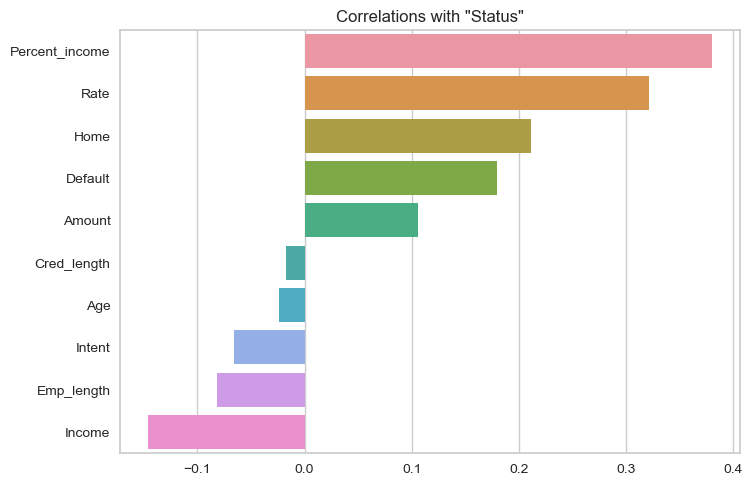

In [26]:
# Correlations with "Status"

limit = -1.0

data = df.corr()["Status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()

In [28]:
#ALGORITHMS

# assign X and y values
X,y=df.drop("Status",axis=1),df[['Status']]

In [29]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25800, 10), (6451, 10), (25800, 1), (6451, 1))

In [30]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Classification Algorithms

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()
ct=CatBoostClassifier(verbose=False)

# fit and predict model
g.fit(X_train,y_train)
b.fit(X_train,y_train)
k.fit(X_train,y_train)
l.fit(X_train,y_train)
d.fit(X_train,y_train)
r.fit(X_train,y_train)
gb.fit(X_train,y_train)
ct.fit(X_train,y_train)

predG=g.predict(X_train)
predB=b.predict(X_train)
predK=k.predict(X_train)
predL=l.predict(X_train)
predD=d.predict(X_train)
predR=r.predict(X_train)
predGB=gb.predict(X_train)
predCT=ct.predict(X_train)

In [32]:
# Print 'accuracy scores'

print('Accuracy Scores:')
print("GaussianNB:       ", accuracy_score(predG,y_train))
print("BernoulliNB:      ", accuracy_score(predB,y_train))
print("KNeighbours:      ", accuracy_score(predK,y_train))
print("LogisticReg:      ", accuracy_score(predL,y_train))
print("DecisionTree:     ", accuracy_score(predD,y_train))
print("RandomForest:     ", accuracy_score(predR,y_train))
print("GradientBoosting: ", accuracy_score(predGB,y_train))
print("CatBoost:         ", accuracy_score(predGB,y_train))

Accuracy Scores:
GaussianNB:        0.8148062015503876
BernoulliNB:       0.7839147286821705
KNeighbours:       0.877170542635659
LogisticReg:       0.8037209302325582
DecisionTree:      1.0
RandomForest:      0.999922480620155
GradientBoosting:  0.909031007751938
CatBoost:          0.909031007751938


In [33]:
#Let's choose RandomForest because this algorithm showed one of the best results

#RANDOMFORESTCLASSIFIER

In [34]:
# Defining y e X

y = df["Status"]
X = df.drop("Status", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25800, 10), (6451, 10), (25800,), (6451,))

In [36]:
# RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(criterion="gini", min_samples_split=2, random_state=123)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [37]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [38]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9188


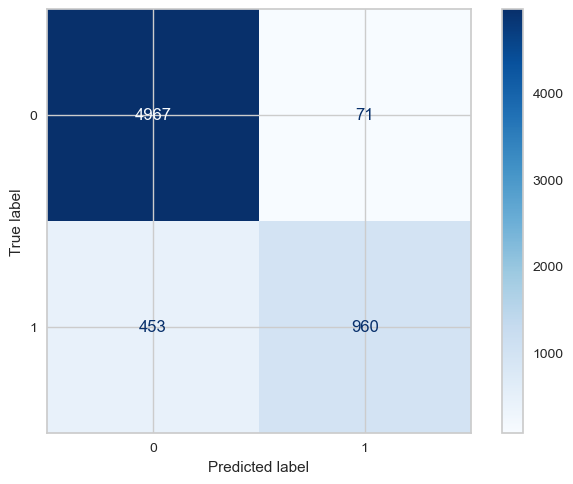

In [39]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['0', '1'])

#We can see a relatively high number of predictions of "0" being "1" for 'Status'. That's not good. So let's go prioritize reducing "0" predictions being "1" using BalancedRandomForestClassifier.

In [40]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install -U imbalanced-learn

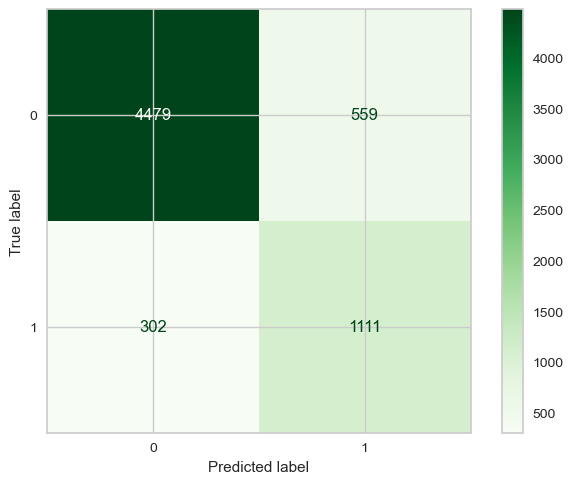

In [44]:
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(random_state=123)
brfc.fit(X_train, y_train)
y_pred = brfc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Greens, normalize = None, display_labels = ['0', '1'])

Okay, now we've narrowed down the predictions of "0" being "1".

In [45]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5038
           1       0.67      0.79      0.72      1413

    accuracy                           0.87      6451
   macro avg       0.80      0.84      0.82      6451
weighted avg       0.88      0.87      0.87      6451



In [46]:
# classification_report_imbalanced

from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.89      0.79      0.91      0.84      0.71      5038
          1       0.67      0.79      0.89      0.72      0.84      0.69      1413

avg / total       0.88      0.87      0.81      0.87      0.84      0.70      6451



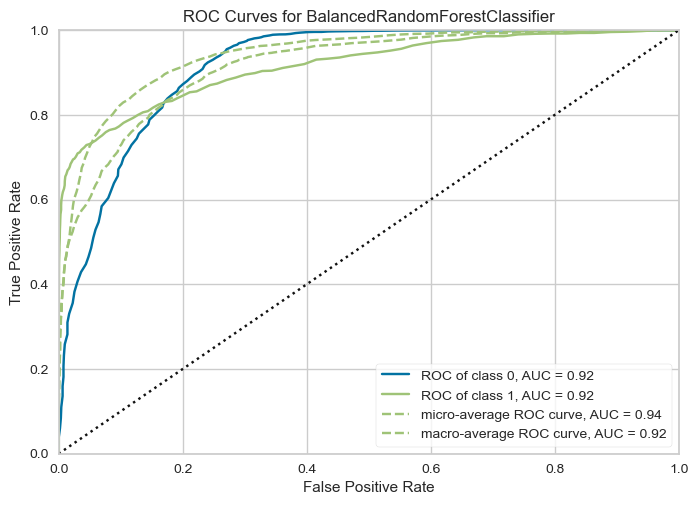

<Axes: title={'center': 'ROC Curves for BalancedRandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
# ROCAUC

visualizer_ROCAUC = ROCAUC(brfc, classes=["0", "1"])

visualizer_ROCAUC.fit(X_train, y_train)       
visualizer_ROCAUC.score(X_test, y_test)        
visualizer_ROCAUC.show()  

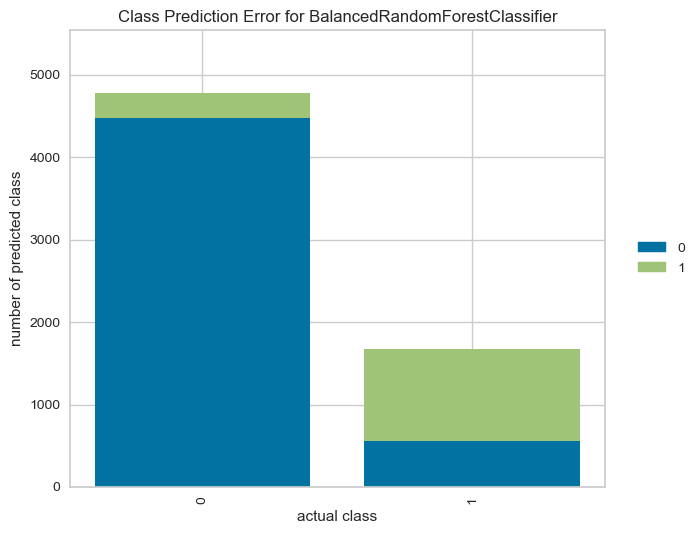

<Axes: title={'center': 'Class Prediction Error for BalancedRandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [48]:
# ClassPredictionError
from yellowbrick.classifier import ClassPredictionError

visualizer_Error = ClassPredictionError(brfc, classes=["0", "1"])

visualizer_Error.fit(X_train, y_train)        
visualizer_Error.score(X_test, y_test)        
visualizer_Error.show() 

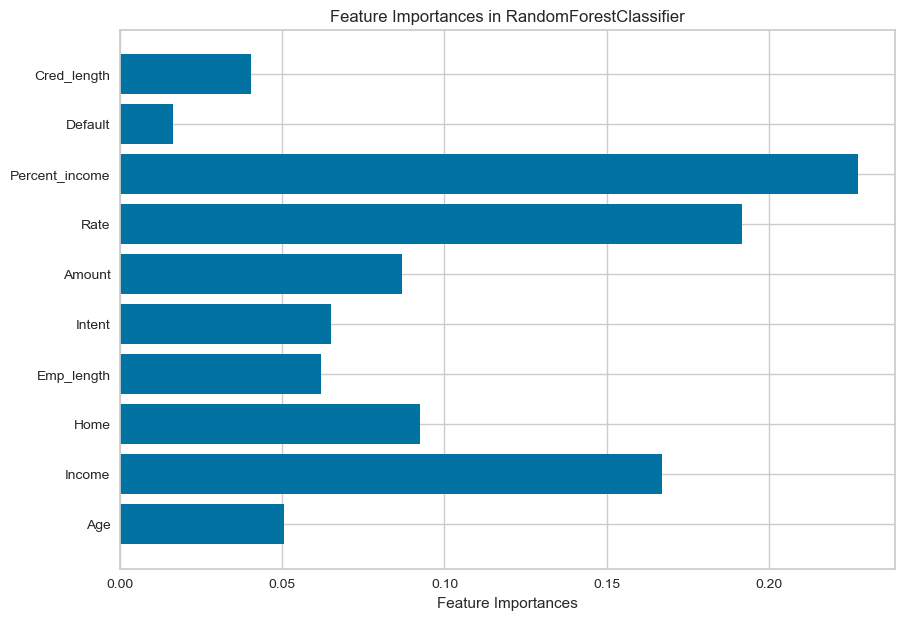

In [49]:
# Feature Importances in Random Forest

feature_names = rfc.feature_names_in_
feature_importances = rfc.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()